# Lab 5: Simple OOP and numpy


__Student:__ damke753

__Student:__ kyrpa853

# 2. Introduction

## Object-oriented Programming

The point of Object-oriented Programming is to support encapsulation and the DRY (Don't Repeat Yourself) principle without things getting out of hand. Often, software architects (those high-level programmers who are responsible for how large systems are designed on a technical level) talk about Object-oriented design or Object-oriented analysis. The point of this is to identify the necessary _objects_ in a system. An object in this sense is not exactly the same as a Python object but rather a somewhat higher level logical unit which can reasonably be thought of as an independent component within the system. These high level objects might then be further subdivided into smaller and smaller objects and at a some level the responsibility shifts from the system architect to the team or individual developer working on a specific component. Thus, Object-oriented thinking is necessary for anyone developing code which will be integrated with a larger system, for instance a data scientist implementing analytics tools.

## OOP in Python

Python implements the Object-oriented paradigm to a somewhat larger degree than the Functional paradigm. However, there are features considered necessary for _strict_ object-oriented programming missing from Python. Mainly, we are talking about data protection. Not in a software security sense, but in the sense of encapsulation. There is no simple way to strictly control access to member variables in Python. This does not affect this lab in any way but is worth remembering if one has worked in a language such as Java previously.

# 3. Simple instance tests in Python

Note: some of these questions will be extremely simple, and some might prove trickier. Don't expect that the answer needs to be hard.

In [1]:
class Person:
    def __init__(self, name):
        self.name = name
        self.age = 0            # Age should be non-negative.
        
    def get_age(self):
        """Return the Person's age, a non-negative number."""
        return self.age
    
    def return_five(self):
        """Return 5. Dummy function."""
        return 5

Jackal = Person 

president = Person("Jeb")
psec = Jackal("CJ Cregg")

a) Change the age of the `president` to 65 (`psec` should be unaffected).

In [2]:
president.age = 65

[Note: This mode of operation is sometimes considered poor OOP. We will remedy this later.]

b) How many `Person` instances are there? One, two or three?

In [3]:
#There are 2 instances of Person.

c) Consider the following code snippets. What do you think that they will return, and why? Discuss amongst yourselves. After that, run the code and explain the output. You only need to write down your explanation of the output.

In [4]:
"Jeb" is Person

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\damia\AppData\Local\Temp\ipykernel_22684\1934482738.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  "Jeb" is Person


False

In [5]:
president is Person

False

In [6]:
# The `is` keyword in python check if 2 items are the same thing. 
# If we wanted to check out if president is an
# instance of Person we should use isinstance. 

d) How would you go about checking whether or not the value bound to the name `president` is-a `Person`?

In [7]:
#Check through isInstance
isinstance(president, Person)

True

# 4. Subclasses

a) Create class `Employee`, a subclass of `Person` with data attributes (fields) 
* `__work_days_accrued`
* `__daily_salary`. 

These should be *the only* data attributes which you write in your class definition. In particular, you may not duplicate `name` and `age`.

There should be methods
* `work` which increments the number of work days accrued.
* `expected_payout` which just returns the expected payout for the employee based on the accrued work days and daily salary (but without doing any resets).
* `payout` which returns the accrued salary and resets the number of work days accrued. The `payout` function may not perform any calculations itself.

In [8]:
# Your code goes here.
class Employee(Person):
    
    def __init__(self, name, daily_salary = 15):
        super().__init__(name)
        self.__daily_salary = daily_salary
        self.__work_days_accrued = 0

    
    def work(self):
        self.__work_days_accrued += 1

    def expected_payout(self):
        return self.__work_days_accrued*self.__daily_salary

    def payout(self):
        accrued_salary = self.expected_payout()
        self.__work_days_accrued = 0
        return accrued_salary

# Ready-made tests.
print("--- Setting up test cases.")
cleaner = Employee(name = "Scruffy")  # Should have daily_salary 15.
josh = Employee(name = "Josh", daily_salary = 1000)
toby = Employee(name = "Toby", daily_salary = 9999)

josh.work()
josh.work()
toby.work()
toby.work()
toby.work()
cleaner.work()

print("--- Testing payout and expected_payout properties.")
assert cleaner.expected_payout() == 15, "default salary should be 15"
assert josh.expected_payout() == 1000*2
assert josh.payout() == 1000*2
assert josh.expected_payout() == 0, "salary should be reset afterwards"
assert toby.payout() == 9999*3, "toby and josh instances should be independent."
print("OK")

print("--- Testing non-data-accessing calls to superclass methods.")
assert josh.return_five() == 5, "Person.return_five should be accessible"
print("OK")

print("--- Testing data that should be set up by initialiser call.")
assert josh.get_age() == 0, "superclass method should be callable, values should not be missing."
josh.age = 9
assert josh.get_age() == 9, "superclass method should be callable"
print("OK")

--- Setting up test cases.
--- Testing payout and expected_payout properties.
OK
--- Testing non-data-accessing calls to superclass methods.
OK
--- Testing data that should be set up by initialiser call.
OK


b) Which public data attributes (fields) does an `Employee` have? Can you access the age of an employee directly (without some transformation of the name)? The daily salary?

In [9]:
# Public data attributes: Daily salary, work accured
print(josh.age)
try:
    print(josh.__daily_salary)
except AttributeError as e:
    print(f"This will raise AttributeError since the attribute is private.\n{e}")
print(vars(josh)["_Employee__daily_salary"])


9
This will raise AttributeError since the attribute is private.
'Employee' object has no attribute '__daily_salary'
1000


# 5. Introductory numpy

A lot of computations will likely end up using data stored `numpy` arrays. Therefore, it is a good idea to have a feeling for how they are used and manipulated. The following steps will provide some introduction, so that we can build upon this in future labs.

You may want to refer to the [official numpy.org absolute beginners guide to numpy](https://numpy.org/devdocs/user/absolute_beginners.html).

a) Import the module `numpy`, giving it the shorthand `np`.

In [1]:
import numpy as np

b) Create the $2 \times 3$ matrix $A = \begin{bmatrix}1 & 2 & 3 \\ 0 & 0 & 1\end{bmatrix}$

In [2]:
A = np.array([[1,2,3],[0,0,1]])


c) Create the vector $b = \begin{bmatrix}1\\ 2 \\ 3 \end{bmatrix}$

In [5]:
b = np.array([[1],[2],[3]])

d) Perform the multiplication $Ab$. What is the result?

In [6]:
np.dot(A,b)


array([[14],
       [ 3]])

e) Mathematically, what should the dimensions of $b^Tb$ be? What should the dimensions of $bb^T$ be?

In [14]:
"""
    b = 3x1
    Therefore transpose(b)*b --> 1x3 * 3x1 = 1x1
    For b*transpose(b) -->  3x1 * 1x3 = 3x3
"""

'\n    b = 3x1\n    Therefore transpose(b)*b --> 1x3 * 3x1 = 1x1\n    For b*transpose(b) -->  3x1 * 1x3 = 3x3\n'

f) Compute ```b.T @ b```? ```b @ b.T``` in numpy. How would you go about calculating $bb^T$ (if you wanted to actually store it as a matrix, which is rarely the most space- or time-efficient idea)?

In [8]:
print(b.T@b)
print(b@b.T)
#In numpy
print(np.matmul(b, b.T))

#Using numpy is more optimal for this case, as the numpy is run in C. (Most of given functions both in python and numpy are optimized)

[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


Note: as `a @ b` is read `a.dot(b)` this should perhaps not be entirely surprising. But it is non-obvious.

d) Try to solve the equation $Ax = b$ using the `solve` method. Does this make mathematical sense? What does numpy say? Read the error message.

In [16]:
np.linalg.solve(A,b)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
print(A.shape)
print(b.shape)
"""
    LinAlgError: Last 2 dimensions of the array must be square
    To solve for x, it can bee seen that A^-1 = (2,3) and b = (3,1). x = (A^1)*b Therefore 2x1 should be possible mathematically.
    Although for numpy linalg it requires A to be a square to use the function.
"""

(2, 3)
(3, 1)


'\n    LinAlgError: Last 2 dimensions of the array must be square\n    To solve for x, it can bee seen that A^-1 = (2,3) and b = (3.1). x= (A^1)*b Therefore 2x1 should be possible mathematically.\n    Although for numpy linalg it requires A to be a square to use the function.\n'

e) Try to solve the equation $A^Tx = b$ using numpy. Does this make mathematical sense? What does numpy say?

In [ ]:
x = np.linalg.solve(A.T,b)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
"""
    The numpy says: Last 2 dimensions of the array must be square.
    To solve for x, it can bee seen that A.T^-1 = (3,2) and b = (3,1). Therefore in a mathematical way it is not possible to be 
    multiply both matrices.
    From the programming way is the same issue, that requires A to be a square.
"""

f) One of the two tasks above make sense from a mathematical point of view. Find a best solution $x$ in the least squares sense.

In [ ]:
x, residuals, rank, s = np.linalg.lstsq(A.T,b)
print(x) #According to the documentation, x is the solution for least squares


[[1.00000000e+00]
 [1.78031751e-16]]


C:\Users\damia\AppData\Local\Temp\ipykernel_13464\1999953590.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, residuals, rank, s = np.linalg.lstsq(A.T,b)


g) Is the resulting $Ax$ or $A^Tx$ (depending on your choice above) close to $b$? What is the norm-2-distance between the vectors?

In [ ]:
print(A.T@x)
#Yes, the A.T X is close to b. 

#As i understand it norm-2-distance is euclidean distance.
print(np.linalg.norm(A.T@x - b, ord=2))


[[1.]
 [2.]
 [3.]]
1.159106867033638e-15


Just to get some practice, run the following to get some test data:

In [ ]:
import sklearn
import sklearn.datasets as ds
houses = ds.fetch_california_housing()

h) How many rows does the dataset have? Columns? Find out using numpy. (First check what `houses` actually is)

In [ ]:
print(houses)
houses["data"].shape
#houses is a dataset in a dictionary. Different keys has different values. 
#The dataset has 20640 rows and 8 columns.
#print(houses.shape)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

(20640, 8)

i) Get the third column (remember: indexing starts at zero, so column number 2) of the dataset by indexing/slicing.

In [ ]:
houses["data"][:,2]

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698])

j) Get the values of the third, fourth and hundredrth rows (that is, index 2, 3, 99).

In [ ]:
houses["data"][[2,3,99],:]

array([[ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 2.61040000e+00,  3.70000000e+01,  3.70714286e+00,
         1.10714286e+00,  1.83800000e+03,  1.87551020e+00,
         3.78200000e+01, -1.22260000e+02]])

k) Mathematical sanity check: without actually computing the rank of ```houses.data```, can you provide a bound? Could it have $10^{15}$ linearly independent rows? 2000? Etc. Write down the tightest bound you can find, and explain why briefly.

In [ ]:
# You may want to look at some properties of the matrix here.
print(min(houses["data"].shape))
#The bound of the houses is the smallest number of rows or columns.
#As the number of columns is equal to 8, it is therefore the tightest bound it can be found. 

8


l) Find out the actual rank of the matrix using numpy. 

In [ ]:
np.linalg.matrix_rank(houses["data"])

8

# 6. A simple classifier

Our goal in this section is to build a naïve subspace-projection based classifier which takes a numerical vector and produces a label. We will build this from the ground up (there are many libraries that perform this automatically, but may not use them in this case).

We will first practice our numpy (and linear algebra) skills to build the algorithm, and then encapsulate data and methods in a class. We will be taking a slightly different route than more general SVD methods for finding principal components, simply because this is not our task. This is worth remembering if you find material on the subject!

The main idea here is to pick out all the data corresponding to a certain set of vectors, and reduce this matrix to some rank $\leq k$ matrix which is a good approximation of the row space in some sense (here: the sense that the vectors correspond to maximal singular values). A naïve classification is then given by picking the subspace which is closest by orthogonal projection.

## The dataset

First, we will import some data. Here we use the classic MNIST data set of handwritten digits. We can naturally partition the sets of vectors used for training and validation in many ways. Feel free to experiment with a nicer (possibly non-deterministic) version later. This is only to get us started, and to have a set of data with known properties (which is helpful for lab assistants).

In [2]:
import sklearn.datasets as ds
digits = ds.load_digits()
training_digits = digits.data[0:600, :]
training_labels = digits.target[0:600]
# The set of labels can be found in digits.target_names.

If we are curious, we can view the images from the dataset.

Text(0.5, 0, 'Index: 2, actually the number 2')

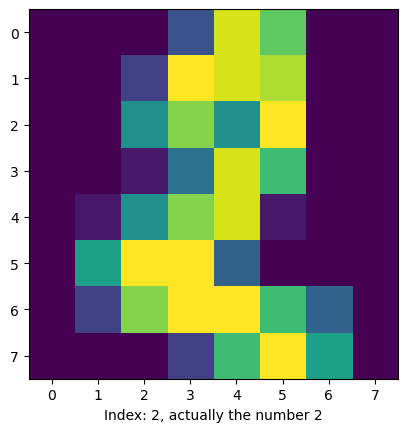

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt 
# We show one of the digits.
d_index = 2
plt.imshow(training_digits[d_index].reshape(8,8))
plt.xlabel(f"Index: {d_index}, actually the number {training_labels[d_index]}")
# Note: digits.images[i] is the same as digits.data[i], but in 8x8 format (no need to reshape).
# We would however like to stress that the 64 pixel images we'll be working with are stored in vector format.

## Tasks

a) Get all rows with label 4. Store that in the matrix $A_4$. Similarly for $A_9$. This should be two single lines of code!

In [4]:
a4 = training_digits[training_labels==4]    # Replace with your code.
a9 = training_digits[training_labels==9]    # Replace with your code.

b) Compute the thin SVD $A_4 = U_4\Sigma_4 V^T_4$ and similarly for $A_9$. Thin here means that you do not necessarily get the full-rank square $U,V^T$ matrices.

In [5]:
u_4,sigma_4,v_4 = np.linalg.svd(a4, full_matrices=False)
u_9,sigma_9,v_9 = np.linalg.svd(a9, full_matrices=False)


In [6]:
print(np.allclose(a9, np.dot(u_9 * sigma_9, v_9)))


True


**Note** Our data is stored by row (one row per digit). What we use the different matrices in the decomposition for is thus slightly different than if it was stored by column. Instead of picking the best $k$ columns of $U$ we pick the best $k$ rows of $V^T$.

c) Let $sample4$ be the first row of $A_4$ and $sample9$ be the first row of $A_9$.

In [7]:
sample_4 = a4[0,:]
sample_9 = a9[0,:]

d) Let $R$ be the first 3 rows of $V^T$. Compute the orthogonal projection of $sample4$ onto the row space of $R_4$, and onto the row space of $R_9$

In [8]:
r4 = v_4[0:3,:]  # Your code here.
r9 = v_9[0:3,:]  # Your code here

coeffs_in_r4 = r4@sample_4  # What are the coordinates of sample4 orthogonally projected onto R4?
coeffs_in_r9 = r9@sample_9

sample4_in_r4 = coeffs_in_r4 @ r4   # Linear combination of rows in R4
sample4_in_r9 = coeffs_in_r9 @ r9   # Your code here.

print(sample4_in_r4.shape)

(64,)


[Mathematical aside: where did the $\Sigma$ go? This is a very important matrix, and strongly affects both interpretations and (in general) row- and column spaces. *Assuming* that the rank is $\geq 3$ the row spaces should be the same whether or not we scale the basis vectors by some $\sigma_i$ (since $\sigma_i > 0$ for all $i=1,2,\ldots, r$). That is enough for our application, though the interpretations of the vectors might be different. The rank assumption is rather important, and we will make rather casually based on knowledge about the data set. Later, we'll include a check for this in our code.]

e) Which of the projections is closest to sample4 (in the sense that the difference (sample4_in_z**?**t - sample4) as the smallest 2-norm?

In [9]:
print(np.linalg.norm(sample4_in_r4 - sample_4, ord=2))
print(np.linalg.norm(sample4_in_r9 - sample_4, ord=2))

19.75899698363074
49.60207545660587


f) Create a function `split_data(data, data_labels, labels)` which takes a matrix of data (such as `training_data`), the labels of all rows (such as `training_labels`) and a vector of the labels (here the numbers 0,...,9) and returns a dictionary mapping a label to the matrix of all corresponding data. 

Here the dictionary would for instance have the key 2, and the corresponding value be the matrix of all the images in `data` classified as the number 2.

In [10]:
def split_data(data, data_labels, labels):
    return {lable: data[np.where(data_labels==lable)] for lable in labels}

g) Create a function `subspaces(labelled_data, k = 3)` that takes a dictionary such as above, and returns a dictionary mapping every occurring label $d$ to the respective $Z_d$ matrix with at most $k$ rows. Here the $Z_d$ matrices is defined as above, the best norm-2-approximation. If a particular matrix has a rank $r < k$, we should only keep $r$ rows (say, if there were many more *different* digit 9-rows in the training set, than digit 1:s)!

In [11]:
def subspaces(labelled_data, k = 3):
    spaces = {}
    for lable in labelled_data.keys():
        r = np.linalg.matrix_rank(labelled_data[lable])
        if r < k:
            keep_rows = r
        else:
            keep_rows = k
        u,sigma,v = np.linalg.svd(labelled_data[lable], full_matrices=False)
        spaces[lable] =  v[:keep_rows, :]
    return spaces

h) Create a function `classification(spaces, x)` that takes a dictionary such as produced by `subspaces` above and a single vector and produces the label of the subspace with the smallest norm-2-distance. In the task above, this would have meant that classifying $sample4$ would have produced the label 4 rather than 9, since $sample4$ was closer to the subspace $Z_4$ than the subspace $Z_9$.

In [31]:
def classification(spaces, x):
    tmp_dict = {}
    for key, value in spaces.items():
        tmp_dict[key] = np.linalg.norm((value@x@value)- x, ord=2)
    return min(tmp_dict, key=tmp_dict.get)

i) Now pick the first 600 rows as training and the remaining (about 1100) as validation sets. What percentage does the classifier get right? What happens if you pick $k = 5, 10, 100, 1000$? Try it out. (The sharp-eyed student will notice that not all of these choices make sense from a mathematical perspective.)

In [41]:
#Training digits already created with name training_digits and training_labels
validation_digits = digits.data[600:, :]
validation_labels = digits.target[600:]

k_values = [5,10,100,1000]

for k in k_values:
    pred = [classification(subspaces(split_data(training_digits, training_labels, digits.target_names), k), validation_digits[x]) 
                  for x in range(validation_digits.shape[0])]
    acc_matrix = [1 if (pred==true) else 0 for pred, true in zip(pred, validation_labels)]
    print(f"The accuracy for k = {k} the accuracy is {sum(acc_matrix)/len(acc_matrix)}")

The accuracy for k = 5 the accuracy is 0.9281537176274018
The accuracy for k = 10 the accuracy is 0.9590643274853801
The accuracy for k = 100 the accuracy is 0.5964912280701754
The accuracy for k = 1000 the accuracy is 0.5964912280701754


## Acknowledgments

This lab in 732A74 is by Anders Märak Leffler (2019), with a major revision in 2020. The introductory text is by Johan Falkenjack (2018).

Licensed under [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).